In [8]:
%cd ../lab4/

/home/luzinsan/Innopolis/Innopolis/2 semester/Reinforcement_Learning_and_Intellectual_Agents/Labs/lab4


## Recap for the MDP lab
### Markov Decision Processes

Let's formalize the key components of the RL problem in the context of MDPs:

An MDP is defined by: $(S, A, P, R, S_0, \gamma)$
* S = set of states (state-space)
* A = set of actions (action-space)
* P = state transition probabilities
* R = reward for taking an action $a\in\text{A}$ in state $s\in\text{S}$
* $S_0$ = starting state
* $\gamma$ = discount rate
    
In more detail:
* **States** - states can be discrete/finite (imagine cells in a grid world) or continuous/infinite (position on a road).
    * Referred to as the *state space* (i.e. discrete state space or continuous state space)
* **Actions** - actions can also be discrete (moving up/down/left/right in a grid world cell) or continuous (how many degrees to turn a steering wheel when driving a car).
    * Referred to as the *action space* (i.e. discrete action space or continuous action space)
* **Rewards** - rewards are issued by a reward function $\rho : S_t \times A_t \rightarrow R$. The reward function is a property of the environment.
* **Transition probabilities**. In MDPs, this is denoted by $P_{s,a}$. The transition probability is the probability that, for example, some action $A$ in state $S$ leads to state $S^\prime$ (prime denotes the next time step) - represented notationally as $P(s^\prime|s,a)$.
* **Discount factor** - the discount factor is a number greater than 0 and less than 1 that is used to discount rewards received over sequential time-steps. It is denoted as $\gamma \in [0, 1)$
* **Value function** - one of the primary functions learned by the agent: the value function dictates either the value of a state or the value of action. More on this below.
* **Policy function** - one of the primary functions learned by the agent: the policy maps states to actions. More below.

#### Other useful definitions
* **Experience** - $\big(\text{State}_{t}$, $\text{Action}_{t}$, $\text{Reward}_{t}\big)$ tuple
* **Trajectory** - A sequence of *experiences* through time, represented as: $\tau$ (tau)
* **Episode** - A trajectory that ends in a terminal state


### Policy

The process of learning for the agent can be thought of as a sequence of mapping states to actions $a = \pi(s)$ to maximize expected reward over an episode. This is known as the **policy:** $\pi: S \rightarrow A$.

Note:
* The agent needs to explore and interact with its environment to learn where actions earn the maximum rewards.
* Actions in the current time step effect rewards in future time steps
* There is a trade off between the frequency of sampling the environment and frequency of taking actions
* It can be based on discrete state-spaces or continuous state-spaces (and same for action-spaces)

### Value functions

The **worthiness** of a policy is calculated by the aforementioned *value function*. There are various forms of value functions. First, the value of a state:

<img src="https://drive.google.com/uc?id=1W6LE42KbtNoOs1LKkFxlWhOF6-7wzWxS" />

Second, the value of action:

<img src="https://drive.google.com/uc?id=1I0Df6jgFDH7gBU1djylJ8ZzmJUO36P9_" />



#### <font color="#DE008A">Bellman's optimal ($*$) action-value function</font> :

$$Q^*{(s,a)} = \ R{(s,a)} + \gamma \max_{a^\prime} \sum_{s^\prime\in\text{S}} \big[P{(s^\prime|s,a)}  Q^*{(s^\prime,a^\prime)}\big]$$


## Cleaning Robot Problem

The main characteristics of this world are the following:

- Discrete time and space
- Fully observable
- Infinite horizon
- Known Transition Model

<img src="https://drive.google.com/uc?id=1Yz6xnDuo6StlKzmj4eDqVYvZfOORBlBT"/>

The main goal for the robot in this task is to find the best way to reach the charging station.

What does the "best way" even mean?
It depends on the reward that the robot receives in each intermediate state -> that leads to multiple optimal policies.

<img src="https://drive.google.com/uc?id=1vef0Xhpy5OMwTxKLgBBqxrxNTp9bhw9S"/>

**The Bellman equation**

$$Q^*{(s,a)} = \ R{(s,a)} + \gamma \max_{a^\prime} \sum_{s^\prime\in\text{S}} \big[P{(s^\prime|s,a)}  Q^*{(s^\prime,a^\prime)}\big]$$

In this example the reward for each non-terminal state is
$$R(s) = −0.04$$


BUT, before we begin let's assume that somehow we got the optima optimal policy and utility values generated by the optimal value-function just to help us understand the idea.

<img src="https://drive.google.com/uc?id=1C-hx0MwCi9hNQcM9Q-QIvVJzalbVWypa"/>

In our example we suppose the robot starts from the state (1,1). Using the Bellman equation we have to find the action with the highest utility between UP, LEFT, DOWN and RIGHT. We do not have the optimal policy, but we have the transition model and the utility values for each state. You have to recall the two main rules of our environment: (i) if the robot bounce on the wall it goes back to the previous state, and (ii) the selected action is executed only with a probability of 80% in accordance with the transition model. Instead of dealing with those ugly numbers I want to show you a visual representaion of the possible outcomes:
<img src="https://drive.google.com/uc?id=1_X65joHfWYkFNEIorjSNXmMR0rRGNTjX"/>

For each possible outcome I reported the utility and the probability given by the transition model. This corresponds to the first part of the Bellman equation. The next step is to calculate the product between the utility and the transition probability, then sum up the value for each action.

<img src="https://drive.google.com/uc?id=1lmDRxIXOs0h6cGP6VzzsRjauu-nGJYbO"/>

We found out that for state (1,1) the action UP has the highest value. This is in accordance with the optimal policy we magically got.

Now we have all the elements and we can plug the values in the Bellman equation finding the utility of the state (1,1):

$$U(s11)=−0.04 + 1.0 × 0.7456= 0.7056$$

## Introduction to Dynamic Programming (DP)

- Dynamic programming (DP) is used to compute optimal policies given a complete model of the environment
  - This model should be a Markov Decision Process (MDP)
  - In dynamic programming, the dynamics function, $P$ should be known
    - i.e $ P(s'|s, a)$ should be fully defined
    - What do we mean by this?
    - Well, basically when given a state and action, the model of the environment will give the probabilities for all possible next states and rewards


- In DP (Dynamic programming) the objective is to determine optimal policies using optimal value functions
  - In order to do that, we first calculate optimal value functions for each state
  - As a recap: value functions allow us to get an idea of how good each state is, in terms of giving highest accumulated reward
    - More formally, state-value functions are the "expected" future rewards starting at some state, $s$ and then following a specific policy
   - Action-value functions are the "expected" future rewards starting at some state $s$ and action $a$ and then following a specific policy
- So, that leads us to one question: how do we determine state-values and action-values?

## The policy iteration algorithm

use the policy iteration algorithm to find an optimal policy that maximizes the expected reward. No policy generates more reward than the optimal policy $\pi^∗$
. Policy iteration is guaranteed to converge and at convergence, the current policy and its utility function are the optimal policy and the optimal utility function. First of all, we define a policy
$\pi$ assigning an action to each state. We can assign random actions to this policy, it does not matter. Using the Bellman equation we can compute the expected utility of the policy. There is a good news. We do not really need the complete version of the Bellman equation which is:

$$Q{(s,a)} = \ R{(s,a)} + \gamma \color{red}{\max_{a^\prime}} \sum_{s^\prime\in\text{S}} \big[P{(s^\prime|s,a)}  Q{(s^\prime,a^\prime)}\big]$$

Since we have a policy and the policy associate to each state an action, we can get rid of the
 max
 operator and use a simplified version of the Bellman equation:

 $$Q{(s,a)} = \ R{(s,a)} + \gamma \sum_{s^\prime\in\text{S}} \big[P{(s^\prime|s,a)}  Q{(s^\prime,\pi(s))}\big]$$


Once we have evaluated the policy, we can improve it. Policy improvement is the second and last step of the algorithm. Our environment has a finite number of states, therefore a finite number of policies. Each iteration returns a better policy.

In [25]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load('T.npy')

In [28]:
class MDP:
  def __init__(self):
        #Starting state vector
        #The agent starts from (1, 1)
        self.states = np.array([[0.0, 0.0, 0.0, 0.0,
                                    0.0, 0.0, 0.0, 0.0,
                                    1.0, 0.0, 0.0, 0.0]])
        self.rewards = np.array([-0.04, -0.04, -0.04,  +1.0,
                                 -0.04,   0.0, -0.04,  -1.0,
                                 -0.04, -0.04, -0.04, -0.04])

        # Probabilities Transition matrix loaded from file
        #(It is too big to write here)
        self.transits = np.load("T.npy")
        #Generate the first policy randomly
        # Nan=Nothing, -1=Terminal, 0=Up, 1=Left, 2=Down, 3=Right
        self.policy = np.random.randint(0, 4, size=(12)).astype(np.float32)
        self.policy[5] = np.nan
        self.policy[3] = self.policy[7] = -1

        #Utility vector
        self.values = np.array([0.0, 0.0, 0.0,  +1.0,
                                0.0, 0.0, 0.0,  -1.0,
                                0.0, 0.0, 0.0,  0.0])
        self.gamma = 0.999

        self.epsilon = 0.0001
        self.iteration = 0

  def policy_evaluation(self, shape=(3,4)):
      """
      One sweep of policy evaluation:
      For each non-terminal & non-obstacle state s,
      update self.values[s] = R(s) + gamma * sum( P(s'|s, action) * values[s'] ).
      The 'action' is the one indicated by the current policy.
      """
      for s in range(12):
          if not np.isnan(self.policy[s]) and self.policy[s] != -1:
              action = int(self.policy[s])  # the chosen action from the policy
              # Probability distribution from state s using 'action'
              prob_dist = self.transits[s, :, action]  # shape (12,)
              # Expected future value under that action
              expected_value = np.sum(prob_dist * self.values)
              # Bellman expectation for policy evaluation
              self.values[s] = self.rewards[s] + self.gamma * expected_value
      return self.values

  def expected_action(self):
      """Return the expected action.

      It returns an action based on the
      expected utility of doing a in state s,
      according to T and u. This action is
      the one that maximize the expected
      utility.

      @return expected action (int)
      """
      actions = np.zeros(4)
      for action in range(4):
        #Expected utility of doing a in state s, according to T and u.
        actions[action] = np.sum(np.multiply(self.values, np.dot(self.states, self.transits[:,:,action])))
      return np.argmax(actions)

def print_policy(p, shape):
    """Printing utility.

    Print the policy actions using symbols:
    ^, v, <, > up, down, left, right
    * terminal states
    # obstacles
    """
    counter = 0
    policy_string = ""
    for row in range(shape[0]):
        for col in range(shape[1]):
            if(p[counter] == -1): policy_string += " *  "
            elif(p[counter] == 0): policy_string += " ^  "
            elif(p[counter] == 1): policy_string += " <  "
            elif(p[counter] == 2): policy_string += " v  "
            elif(p[counter] == 3): policy_string += " >  "
            elif(np.isnan(p[counter])): policy_string += " #  "
            counter += 1
        policy_string += '\n'
    print(policy_string)


def generate_graph(utility_list):
    """Given a list of utility arrays (one for each iteration)
    it generates a matplotlib graph and save it as 'output.jpg'
    """
    name_list = ('(1,3)', '(2,3)', '(3,3)', '+1', '(1,2)', '#', '(3,2)', '-1', '(1,1)', '(2,1)', '(3,1)', '(4,1)')
    color_list = ('cyan', 'teal', 'blue', 'green', 'magenta', 'black', 'yellow', 'red', 'brown', 'pink', 'gray', 'sienna')
    counter = 0
    index_vector = np.arange(len(utility_list))
    for state in range(12):
        state_list = list()
        for utility_array in utility_list:
            state_list.append(utility_array[state])
        plt.plot(index_vector, state_list, color=color_list[state], label=name_list[state])
        counter += 1
    #Adjust the legend and the axis
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.4), ncol=3, fancybox=True, shadow=True)
    plt.ylim((-1.1, +1.1))
    plt.xlim((1, len(utility_list)-1))
    plt.ylabel('Utility', fontsize=15)
    plt.xlabel('Iterations', fontsize=15)
    plt.savefig("./output.jpg", dpi=500)

=================== FINAL RESULT ==================
Iterations: 22
Delta: 7.485759478953469e-08
Gamma: 0.999
Epsilon: 0.0001
[0.80796344 0.86539911 0.91653199 1.        ]
[ 0.75696624  0.          0.65836281 -1.        ]
[0.69968296 0.64882105 0.60471973 0.38150427]
 >   >   >   *  
 ^   #   ^   *  
 ^   <   <   <  



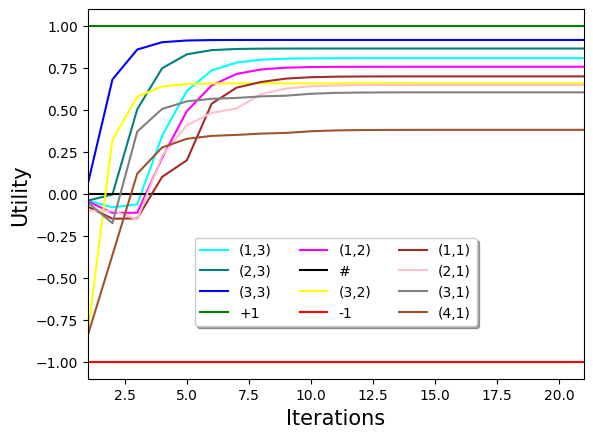

In [31]:
mdp = MDP()
graph_list = list()

while True:
    mdp.iteration += 1
    #1- Policy evaluation
    u_old = mdp.values.copy()
    u = mdp.policy_evaluation()
    graph_list.append(u_old)
    #Stopping criteria
    delta = np.absolute(u - u_old).max()
    if delta < mdp.epsilon * (1 - mdp.gamma) / mdp.gamma: break
    for s in range(12):
        if not np.isnan(mdp.policy[s]) and not mdp.policy[s]==-1:
            mdp.states = np.zeros((1,12))
            mdp.states[0,s] = 1.0
            #2- Policy improvement
            a = mdp.expected_action()
            if a != mdp.policy[s]: mdp.policy[s] = a
    # print_policy(mdp.policy, shape=(3,4))

print("=================== FINAL RESULT ==================")
print("Iterations: " + str(mdp.iteration))
print("Delta: " + str(delta))
print("Gamma: " + str(mdp.gamma))
print("Epsilon: " + str(mdp.epsilon))
print("===================================================")
print(u[0:4])
print(u[4:8])
print(u[8:12])
print("===================================================")
print_policy(mdp.policy, shape=(3,4))
print("===================================================")
generate_graph(graph_list)